In [22]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
load=load_iris()
df=pd.DataFrame(load.data,columns=load.feature_names)
df['target']=load.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [24]:
df1=df[df.target==0]
df2=df[df.target==1]
df3=df[df.target==2]

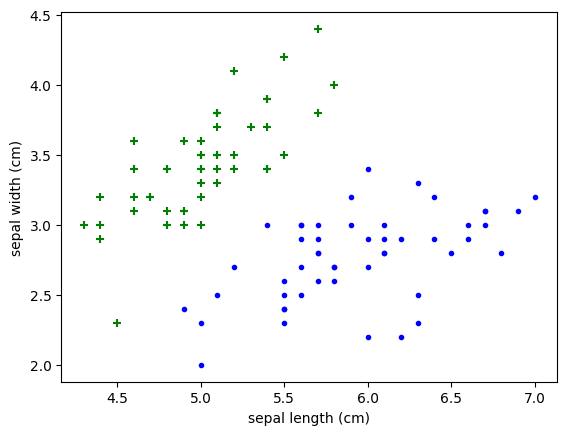

In [25]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='green',marker='+')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='blue',marker='.')


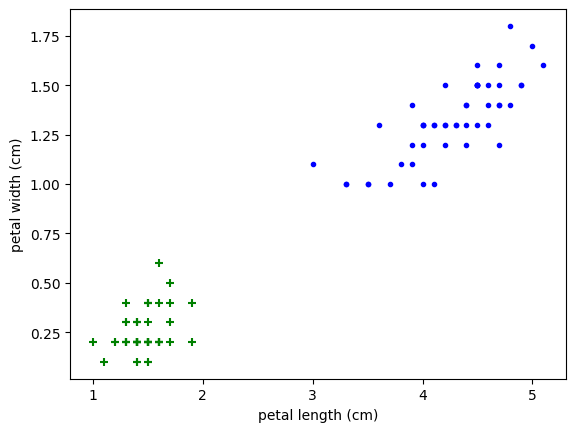

In [26]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='green',marker='+')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='blue',marker='.')


In [27]:
df['flower_name']=df.target.apply(lambda x:load.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [28]:
x=df.drop(['target','flower_name'],axis='columns')
y=df.target

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# **Create K_Nereast Neighbour Classifier**

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [31]:
knn.score(x_test,y_test)

1.0

# **Confusion Matrix**

In [32]:
from sklearn.metrics import confusion_matrix
y_pred=knn.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 8,  0,  0],
       [ 0, 14,  0],
       [ 0,  0,  8]])

Text(95.72222222222221, 0.5, 'Truth')

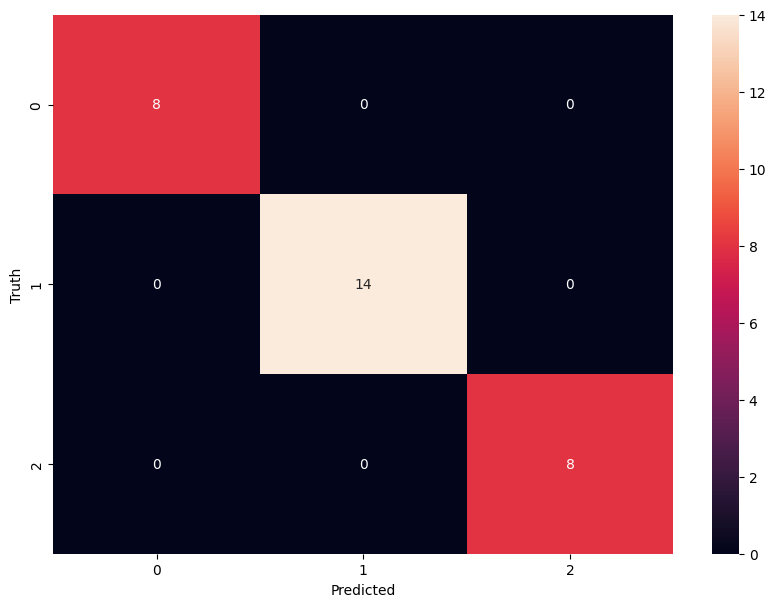

In [33]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# **Classification Report**

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

